<img src="https://raw.githubusercontent.com/dadosaocubo/classificacao/master/DadosAoCubo.png" alt="drawing" width="500"/>

[__D³__](https://dadosaocubo.com/) by [__Tiago Dias__](https://www.linkedin.com/in/diasctiago/) 

# Bibliotecas

In [2]:
import requests
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Requisição API

In [3]:
# Requisição dos dados dos Deputados
url        = 'https://dadosabertos.camara.leg.br/api/v2/deputados'
parametros = {}
resposta   = requests.request("GET", url, params=parametros)
objetos    = json.loads(resposta.text)
dados      = objetos['dados']

In [4]:
len(dados)

513

In [5]:
dados[0]

{'email': 'dep.abiliosantana@camara.leg.br',
 'id': 204554,
 'idLegislatura': 56,
 'nome': 'Abílio Santana',
 'siglaPartido': 'PL',
 'siglaUf': 'BA',
 'uri': 'https://dadosabertos.camara.leg.br/api/v2/deputados/204554',
 'uriPartido': 'https://dadosabertos.camara.leg.br/api/v2/partidos/37906',
 'urlFoto': 'https://www.camara.leg.br/internet/deputado/bandep/204554.jpg'}

In [6]:
# Requisição dos dados dos Deputados utilizando parametros
url              = 'https://dadosabertos.camara.leg.br/api/v2/deputados'
parametros       = {'id': 204554}
resposta         = requests.request("GET", url, params=parametros)
objetos          = json.loads(resposta.text)
dados_parametros = objetos['dados']

In [7]:
len(dados_parametros)

1

In [15]:
dados_parametros

[{'email': 'dep.abiliosantana@camara.leg.br',
  'id': 204554,
  'idLegislatura': 56,
  'nome': 'Abílio Santana',
  'siglaPartido': 'PL',
  'siglaUf': 'BA',
  'uri': 'https://dadosabertos.camara.leg.br/api/v2/deputados/204554',
  'uriPartido': 'https://dadosabertos.camara.leg.br/api/v2/partidos/37906',
  'urlFoto': 'https://www.camara.leg.br/internet/deputado/bandep/204554.jpg'}]

# Estruturando dados com Pandas

In [9]:
df = pd.DataFrame(dados)
df.head()

,id,uri,nome,siglaPartido,uriPartido,siglaUf,idLegislatura,urlFoto,email
0,204554,https://dadosabertos.camara.leg.br/api/v2/depu...,Abílio Santana,PL,https://dadosabertos.camara.leg.br/api/v2/part...,BA,56,https://www.camara.leg.br/internet/deputado/ba...,dep.abiliosantana@camara.leg.br
1,204521,https://dadosabertos.camara.leg.br/api/v2/depu...,Abou Anni,PSL,https://dadosabertos.camara.leg.br/api/v2/part...,SP,56,https://www.camara.leg.br/internet/deputado/ba...,dep.abouanni@camara.leg.br
2,204379,https://dadosabertos.camara.leg.br/api/v2/depu...,Acácio Favacho,PROS,https://dadosabertos.camara.leg.br/api/v2/part...,AP,56,https://www.camara.leg.br/internet/deputado/ba...,dep.acaciofavacho@camara.leg.br
3,204560,https://dadosabertos.camara.leg.br/api/v2/depu...,Adolfo Viana,PSDB,https://dadosabertos.camara.leg.br/api/v2/part...,BA,56,https://www.camara.leg.br/internet/deputado/ba...,dep.adolfoviana@camara.leg.br
4,204528,https://dadosabertos.camara.leg.br/api/v2/depu...,Adriana Ventura,NOVO,https://dadosabertos.camara.leg.br/api/v2/part...,SP,56,https://www.camara.leg.br/internet/deputado/ba...,dep.adrianaventura@camara.leg.br


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             513 non-null    int64 
 1   uri            513 non-null    object
 2   nome           513 non-null    object
 3   siglaPartido   513 non-null    object
 4   uriPartido     513 non-null    object
 5   siglaUf        513 non-null    object
 6   idLegislatura  513 non-null    int64 
 7   urlFoto        513 non-null    object
 8   email          513 non-null    object
dtypes: int64(2), object(7)
memory usage: 36.2+ KB


# Analisando os Dados

[]

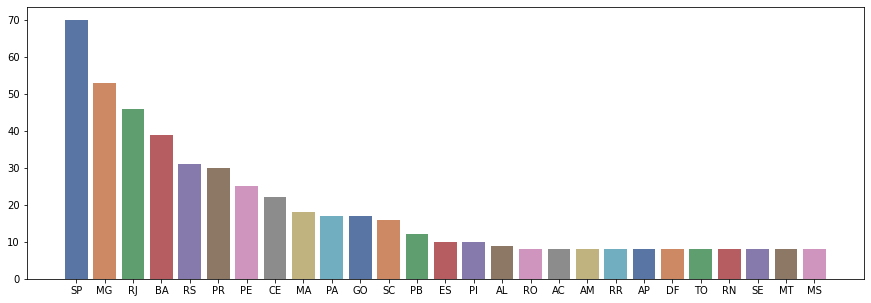

In [11]:
# Análise da quantidade de deputados por UF
x = df['siglaUf'].value_counts().index
y = df['siglaUf'].value_counts().values
plt.figure(figsize = (15, 5))
sns.barplot(x=x, y=y, palette="deep")
plt.plot()

[]

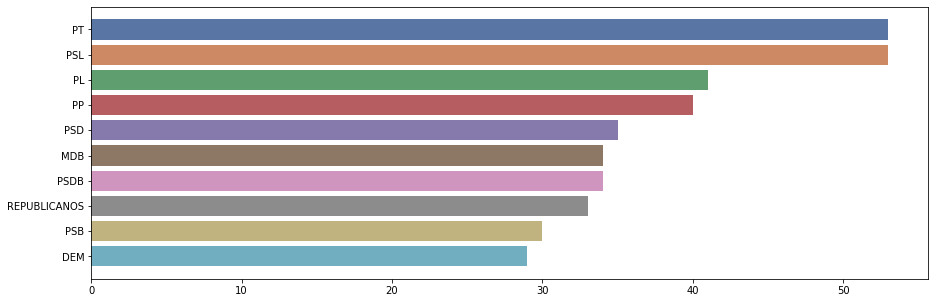

In [12]:
# Análise da quantidade de deputados por Partido
x = df['siglaPartido'].value_counts().head(10).values
y = df['siglaPartido'].value_counts().head(10).index
plt.figure(figsize = (15, 5))
sns.barplot(x=x, y=y, palette="deep")
plt.plot()

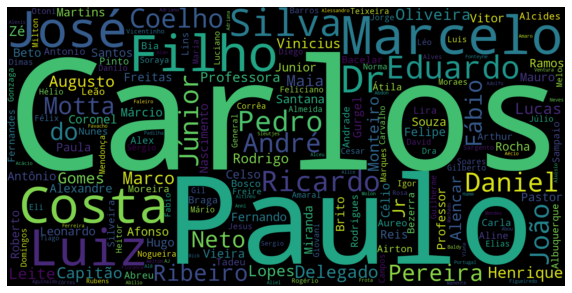

In [13]:
# Análise de nomes de deputados mais comuns
todos_itens = ' '.join(s for s in df['nome'].values)
stop_words = ['de','da']

# criar uma wordcloud
wc = WordCloud(stopwords=stop_words, background_color="black", width=1600, height=800)
wordcloud = wc.generate(todos_itens)

# plotar wordcloud
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()